In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 회귀(Regression)

- 모델 파라미터 
    - 기울기(가중치 weight, 계수 coefficient) : coef_
    - 절편(bias) : intercept_
    
    
    
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 예를들면 아파트의 방 개수, 화장실 크기 등의 독립변수에 따라서 아파트 가격인 종속변수가 어떤 관계를 가지는지를 모델링하고 예측하는 것


    
```
선형 분석은 영국의 유전학자 Francis Galton이 유전의 법칙을 연구하다 나온 것에 기인하게 된다. 
연구의 내용은 부모와 자녀의 키 사이의 관계 였는데 연구결과로, 
아버지와 어머니의 키의 평균을 조사하여 표로 나타낸 결과 자녀의 키는 엄청 크거나 작은 것이 아닌 
그 세대의 평균으로 돌아가려는 경향이 있다는 것을 발견하였다.
Galton은 이를 회귀 분석(Regression Analysis) 라고 명칭하였다.
```

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Regression_lineaire_avec_R.svg/500px-Regression_lineaire_avec_R.svg.png'>

# 농어의 길이와 무게

#### 데이타준비  http://bit.ly/perch_data

- 농어의 길이 => X
- 농어의 무게 => y 

In [3]:
from sklearn.model_selection import train_test_split

# from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [5]:
print(dir(LinearRegression))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', 'fit', 'get_params', 'predict', 'score', 'set_params']


In [6]:
# X
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ).reshape(-1, 1)

# y
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ).reshape(-1, 1)

In [8]:
perch_length.shape, perch_weight.shape

((56, 1), (56, 1))

In [9]:
# 데이타프레임화 
perch_df = pd.DataFrame(columns=['length','weight'])
perch_df['length'] = perch_length.flatten() 
perch_df['weight'] = perch_weight.flatten() 
perch_df.head(3)

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


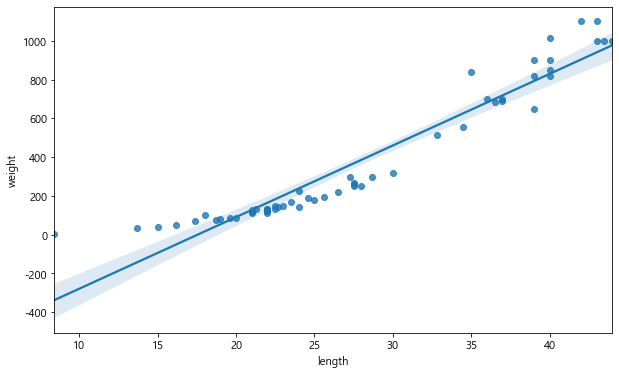

In [11]:
# 산점도 + 회기선 
sns.regplot(x='length' , y='weight', data=perch_df);

In [10]:
sns.regplot?

In [12]:
perch_length.ndim, perch_weight.ndim, perch_length.shape, perch_weight.shape

(2, 2, (56, 1), (56, 1))

In [13]:
print(perch_length[:3])
print()
print(perch_weight[:3])

[[ 8.4]
 [13.7]
 [15. ]]

[[ 5.9]
 [32. ]
 [40. ]]


In [14]:
# 학습 데이타와 테스트 데이타 분리 
# 0.25 기본 테스트 사이트 
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# 모델 생성
model_lr = LinearRegression()
# 학습 
model_lr.fit(X_train, y_train)

LinearRegression()

In [17]:
model_lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [18]:
# 농어의 길이는 50 => 무게는?
print(model_lr.predict([[50]]))

[[1241.83860323]]


In [22]:
# 기울기(가중치 weight, 계수 coefficient) : coef_
# 절편(bias) : intercept_
    
print('기울기 =>', model_lr.coef_, '절편 => ', model_lr.intercept_)

기울기 => [[39.01714496]] 절편 =>  [-709.01864495]


In [23]:
# 농어의길이*model_lr.coef_[0,0] + model_lr.intercept_
(50*39.01714496)-709.01864495

1241.8386030500003

In [26]:
x = 50
x*model_lr.coef_ + model_lr.intercept_

array([[1241.83860323]])

In [24]:
model_lr.coef_[0,0]

39.0171449636302

In [27]:
# 학습데이타의 최소, 최대
X_train.min(), X_train.max()

(13.7, 44.0)

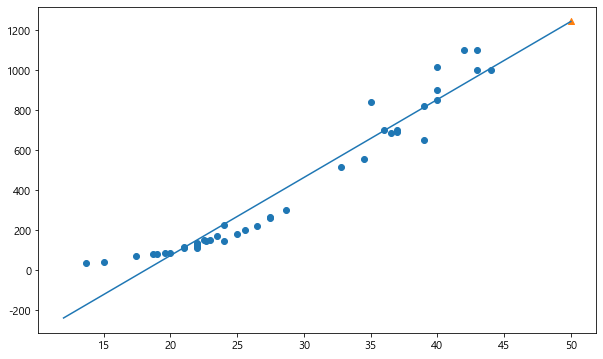

In [30]:
# 학습데이타 
plt.scatter(X_train, y_train)

# 회기선
plt.plot([12, 50], [12*model_lr.coef_[0,0] + model_lr.intercept_ , 50*model_lr.coef_[0,0] + model_lr.intercept_ ])

# 새로운 데이타 50, 예측값 y
plt.scatter(50, 1241.8, marker='^')
plt.show()


In [31]:
print( model_lr.score(X_train, y_train))
print( model_lr.score(X_test, y_test))

0.939846333997604
0.8247503123313558


# 선형회귀 평가지표 

- MAE, MSE, RMSE, MSLE, RMSLE
- R²

```
실제 값과 회귀 예측값의 차이를 기반으로 한다.  
MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋은 것이다. 
값이 작을수록 예측값과 실제값의 차이가 없다는 뜻
반면, R² 는 값이 클수록 성능이 좋다.
```

```
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

MAE =  mean_absolute_error(y_test, model.predict(X_test))

MSE = mean_squared_error(y_test, model.predict(X_test))

RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(y_test, model.predict(X_test))

RMSLE = np.sqrt(mean_squared_log_error(y_test, model.predict(X_test)))

R2 = r2_score(y_test, model.predict(X_test))
```

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MAE =  mean_absolute_error(y_test, model_lr.predict(X_test))
MSE =  mean_squared_error(y_test, model_lr.predict(X_test))
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, model_lr.predict(X_test))

print(f'MAE =  {MAE}')
print(f'MSE =  {MSE}')
print(f'RMSE =  {RMSE}')
print(f'R2 =  {R2}')

# 퀴즈 

보스턴 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라 


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)